# Algoritmo de detección de estilo musical para canciones de Spotify
## Modelo N°2

En esta segunda parte se busca que detecte si una determinada canción pertenece a una playlist de cumbia clasica o a una playlist de Rock Nacional. Para esto se cuenta con 2 datasets, uno de cada estilo musical, que juntan diversas playlists que en Spotify se seleccionan como estos generos musicales.

In [1]:
genero_0 = 'Rock Nacional'  # Género del Target 0
genero_1 = 'Cumbia Clásica'  # Género del Target 1

La información se almacena en 2 tablas distintas las cuales son:

__Dataset0:__ Contiene las características de las canciones de Rock Nacional extraídas de Spotify.

__Dataset1:__ Contiene las características de las canciones de Cumbia Clásica extraídas de Spotify.

# Indice

* [Datasets](#Datasets)
* [EDA - Analisis exploratorio de Datos](#EDA---Analisis-exploratorio-de-Datos)
* [Selección del algoritmo](#Selección-del-algoritmo)

# Datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ply

In [3]:
np.random.seed(5) #Se selecciona una seed para que los números aleatorios generados por Python sean los mismos en cada ejecución
#del código y los resultados sean reproducibles y mantengan el sentido con lo analizado en los _Markdowns_

In [4]:
#Importo los datasets
df0 = pd.read_csv('Rock nacional.csv')
df1 = pd.read_csv('Cumbia bailable.csv')


In [5]:
#Muestra del dataset de música clásica
print('El dataset de ' + str(genero_0) + ' contiene:', df0.shape[0], 'canciones')
df0.sample(2).head()

El dataset de Rock Nacional contiene: 831 canciones


,id,title,all_artists,popularity,release_date,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
754,0pvHj0RHMGZ7JBOYh7Kmsk,Fuiste lo mejor,Intoxicados,55,2005,False,0.509,0.374,7,-9.554,1,0.5930,0.000000,0.0667,0.258,94.954,269012,4,0
793,4MPwBYidOWnwpKlqQYJEzX,Va A Escampar,La Vela Puerca,58,2004-01-01,False,0.616,0.737,9,-5.103,0,0.0135,0.000043,0.1540,0.339,124.000,281533,4,0


In [6]:
#Muestra del dataset de música clásica
print('El dataset de ' + str(genero_1) + ' contiene:', df1.shape[0], 'canciones')
df1.sample(2).head()

El dataset de Cumbia Clásica contiene: 733 canciones


,id,title,all_artists,popularity,release_date,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
695,5uaL4Wve3l7gUR3NvtIh5e,Como Fui a Enamorarme de Ti,La Nueva Luna,0,2002-10-23,False,0.770,0.775,2,-4.350,1,0.230,0.000005,0.0975,0.921,89.169,245838,4,1
433,7mj4IgncAWZmVjLXaJX4ad,Move la Co,Los Palmeras,0,2010-01-01,False,0.859,0.847,2,-4.164,1,0.327,0.000000,0.0550,0.902,88.210,206187,4,1


###### Descripción de cada feature

1. id: El ID que la canción tiene en Spotify. Puede usarse para obtener el link a la canción.
2. title: Es el nombre de la canción. 
3. all_artist: Contiene el nombre del artita principal de la canción.
4. popularity: Varía entre 0 y 100 y determina la popularidad de una canción actualmente.
5. release_date: Contiene en un string la fecha de publicación de la canción. En algunos casos viejos solo contiene el año, mientras que ususalmente contiene también dia y mes en formato año-mes-día.
6. explicit: Determina si se seleccionó a la canción como que contiene letras explícitas. 0 es que no contiene y 1 es que si contiene.
7. danceability: Varía entre 0 y 1 y determina que tan apta es la canción para bailar.
8. energy: Varía entre 0 y 1 y representa la intensidad y acitvidad de la canción.
9. key: La nota principal de la canción, siendo 0 la nota "Do" y subiendo de a semitonos hasta 11 la cual es "Si". Si es -1 no se pudo detectar la nota.
10. loudness: Varía entre -60 y 0 y determina la intensidad psicológica del nivel sonoro promedio de la canción en dB. 
11. mode: Indica la modalidad de la canción, siendo menor cuando es 0 y mayor cuando es 1.
12. acousticness: Varía entre 0 y 1, siendo esta la confianza de que la canción sea acustica.
13. instrumentalness: Varía entre 0 y 1 y es la confianza de que la canción no contenga conteido cantado. Sonidos de acompañamento como "Ohh" y "Ahh" no se cuenta como letra cantada.
14. liveness: Varía entre 0 y 1 y es la confianza de que se detectó una audiencia en la canción, como por ejemplo una versión en vivo en algún recital.
15. valence: Describe la positividad de la canción variando entre 0 y 1, siendo los valores mas altos las canciones mas postivas (feliz, alegre, euforica), mientras que los valores mas bajos las canciones mas negativas (triste, depresiva, enojada).
16. tempo: Es el tempo promedio detectado de la canción en BPM.
17. duration_ms: Es la duración de la canción en milisegundos.
18. time_signature: Es el patrón rítmico detectado de la canción, siendo "X/4" con X e valor mostrado en el dataset.
19. target: A que playlist perteneces, 0 es clásica y 1 es trap.


## Modificación de la "release_date" a "year"


El release_date no es muy útil en este formato, por lo que se lo transforma a 'year' para que así solo contenga en año en que se lanzó la canción.

In [7]:
df0.rename(columns={'release_date': 'year'}, inplace=True)

for i in range(df0.shape[0]):
    df0.loc[i, 'year'] = df0.loc[i, 'year'][0:4] 
    
df0['year'] = df0['year'].astype('int')  

df0.head(1)

,id,title,all_artists,popularity,year,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,1MRhIdcloOD0uiiG3ybXGX,Un Poco de Amor Francés,Patricio Rey y sus Redonditos de Ricota,62,1991,False,0.532,0.776,9,-7.873,0,0.024,0.000419,0.358,0.667,137.736,206200,4,0


In [8]:
df1.rename(columns={'release_date': 'year'}, inplace=True)

for i in range(df1.shape[0]):
    df1.loc[i, 'year'] = df1.loc[i, 'year'][0:4] 
    
df1['year'] = df1['year'].astype('int')    

df1.head(1)


,id,title,all_artists,popularity,year,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,5ISajXj2M1yvkrC0KsgbR5,Jurabas Tu,Los del Fuego,63,2009,False,0.752,0.702,2,-5.024,1,0.498,0.0,0.0601,0.853,100.017,189153,4,1


La modificación del campo release_date al campo year se logró de forma exitosa.

## Analisis de cada feature

In [9]:
#No se observan valores faltantes, algo esperado ya que los valores fueron tomados de la APi de Spotify
print(genero_0)
df0.count()

Rock Nacional


id                  831
title               831
all_artists         831
popularity          831
year                831
explicit            831
danceability        831
energy              831
key                 831
loudness            831
mode                831
acousticness        831
instrumentalness    831
liveness            831
valence             831
tempo               831
duration_ms         831
time_signature      831
target              831
dtype: int64

In [10]:
print(genero_1)
df1.count()

Cumbia Clásica


id                  733
title               733
all_artists         733
popularity          733
year                733
explicit            733
danceability        733
energy              733
key                 733
loudness            733
mode                733
acousticness        733
instrumentalness    733
liveness            733
valence             733
tempo               733
duration_ms         733
time_signature      733
target              733
dtype: int64

In [11]:
print('Tipo de cada feature')
df0.dtypes

Tipo de cada feature


id                   object
title                object
all_artists          object
popularity            int64
year                  int32
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
target                int64
dtype: object

# EDA - Analisis exploratorio de Datos

## Analisis Univariado del proyecto

Se observa que el year es cuando se grabó la versión de la canción que está en spotify, no cuando fue originalmente creada la misma. Sin embargo, la gran diferenecia entre los datasets es muy visible ya que el dataset de trap comienza en el 2016 y la clásica tiene gran parte de sus canciones desde antes del 2014.

In [12]:
fig = ply.histogram(df0['explicit'].replace({False: 'No', True: 'Si'}), x = 'explicit', title='Canciones por año', color_discrete_sequence=['indianred'], labels={'explicit': 'Explicita', '0': 'No'})
fig.update_layout(title={
        'text': "Cantidad de canciones con o sin letras explicitas de " + str(genero_0),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title_text = 'Contiene letras explicitas?')
fig.update_yaxes(title_text = 'Cantidad de canciones')
fig.show()

In [13]:
fig = ply.histogram(df1['explicit'].replace({False: 'No', True: 'Si'}), x = 'explicit', title='Canciones por año', color_discrete_sequence=['indianred'], labels={'explicit': 'Explicita', '0': 'No'})
fig.update_layout(title={
        'text': "Cantidad de canciones con o sin letras explicitas de " + str(genero_1),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title_text = 'Contiene letras explicitas?')
fig.update_yaxes(title_text = 'Cantidad de canciones')
fig.show()

En este caso ambos géneros tienen muy pocas canciones con letras explícitas.

## Analisis Bivariado del proyecto

Al tener una gran cantidad de campos numéricos un HeatMap es muy util para encontrar relaciones lineales entre las variables, Puede ser que el Heatmap no reconozca una relación existente entre las variables debido a que la misma no es lineal. Para hacer esto se unen los datasets en un dataset final y así poder observar la relación con el target.



In [14]:
df_final = pd.concat([df0, df1], ignore_index=True)

print(df_final.shape)
df_final.sample(3).head()

(1564, 19)


,id,title,all_artists,popularity,year,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
311,2pmHBQiIjVfTyn3p1rRbSB,Esta Saliendo El Sol,Intoxicados,63,2003,False,0.695,0.680,9,-7.629,1,0.0168,0.039000,0.330,0.887,122.967,248600,4,0
1148,6XrsyXHgs5wS1Vu2aUFaB3,Recordando a Natacha,Grupo Sombras,34,2002,False,0.672,0.723,10,-4.907,1,0.6890,0.000007,0.105,0.941,104.440,194093,4,1
789,3iPnW4bkHWaBQWdLRus2xU,Vas a Bailar,Ciro y los Persas,0,2010,False,0.698,0.659,7,-7.259,1,0.3000,0.000006,0.117,0.466,113.942,299630,4,0


In [15]:
#HeatMap 
plt.rcParams['figure.figsize'] = (20, 15)


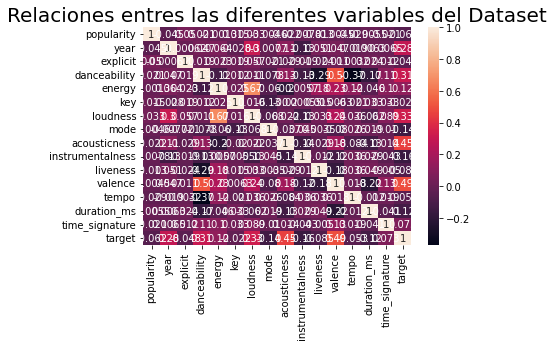

In [16]:

sns.heatmap(df_final.corr(), annot = True)
plt.title('Relaciones entres las diferentes variables del Dataset', fontsize = 20)

plt.show()



Se observa como la target tiene relaciones menos fuertes que en el caso anterior (dado por la similitud de los géneros), aunque mantiene relaciones interesantes con las variables Valence, Acousticness, Loudness y Danceability.

Al tener ambos dataframes juntos se puede observar la distribución de las canciones a través de los años de una manera mejor

In [17]:
fig = ply.histogram(df_final.replace({0: str(genero_0), 1: str(genero_1)}), x = 'year', 
                    title='Canciones por año', color='target', labels={'target': 'Playlist:'}, nbins=100)

fig.update_layout(title={
        'text': "Cantidad de canciones por año segmentada por lista",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title_text = 'Año')
fig.update_yaxes(title_text = 'Cantidad de canciones')

fig.show()

La relación entre el target y la acousticness de las canciones es de las mas fuertes por lo visto en el HeatMap. Esta relación se observa en el siguiente gráfico de violín. 

In [18]:
fig = ply.violin(df_final.replace({0: str(genero_0), 1: str(genero_1)}),'target','acousticness', color_discrete_sequence=['indianred'])

fig.update_layout(title={
        'text': "Distribución de la danceability para cada target", 'y':0.95, 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(title_text = 'Playlist')
fig.update_yaxes(title_text = 'Danceability')

fig.show()

Se ve que el Rock Nacional tiene una distribución muy concentrada cerca del cero, mientras que en el caso de la Cumbia Clásica es mas uniforme.

## Analisis Multivariado del proyecto

Se analiza la relación de *valence* con *loudness* y la playlist a la que pertenecen.

In [19]:
df_test = df_final.copy()
df_test['target'] = df_test['target'].astype('str')

fig = ply.scatter(df_test.replace({'0':str(genero_0), '1': str(genero_1)}), 'valence', 'loudness', 
                  color='target', labels={'target': 'Playlist'}, trendline='ols')

fig.update_layout(title={
        'text': "Relación de acousticness con popularity y loudness", 'y':0.95, 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top'})
fig.update_yaxes(title_text = 'Energy')
fig.update_xaxes(title_text = 'Acousticness')
fig.show()

Se observa una diferencia entre ambas playlists, mientras que la relación entre las features también presenta cierta tendencia.

Las features *Loudness* y *Energy*, las cuales estan muy relacionadas entre si, presentan a su ves relaciones cpn *valence*, *acousticness*, *danceability* y *explicit*, las cuales se pueden analizar una por una con un pariplot

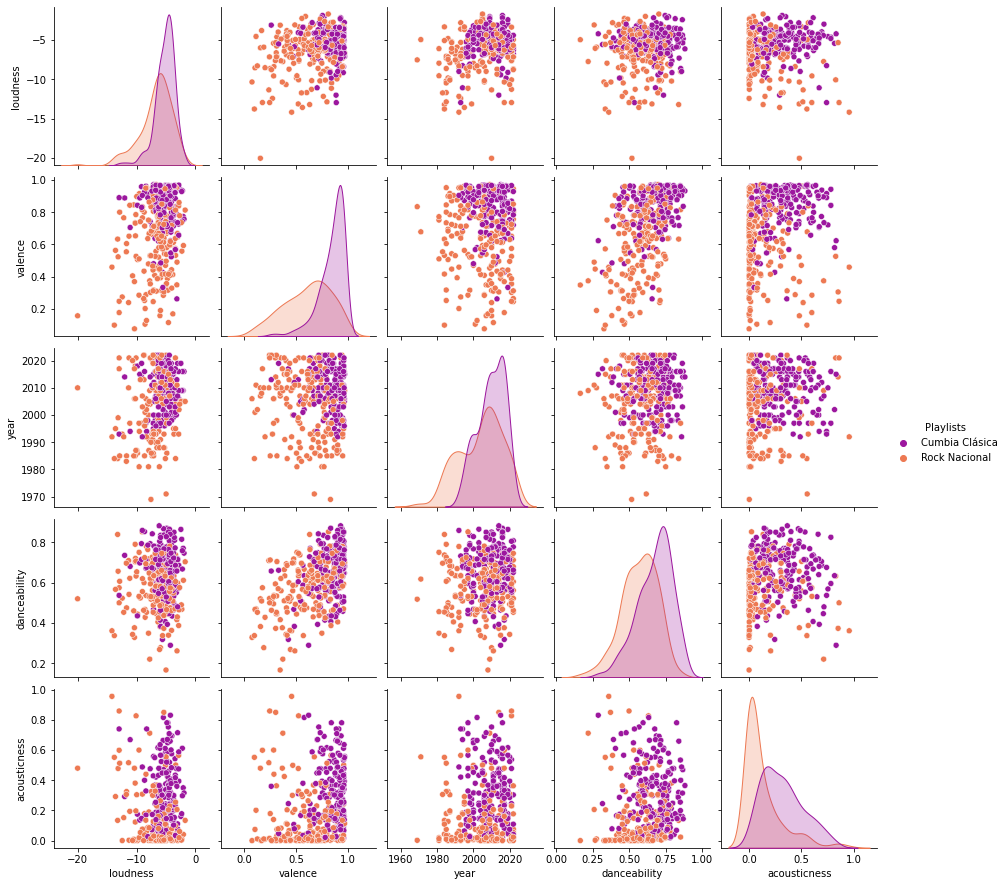

In [20]:
df_test = df_final.copy()
df_test['target'].replace({0: str(genero_0), 1: str(genero_1)}, inplace=True);
df_test.rename(columns={'target': 'Playlists'}, inplace=True)
sns.pairplot(df_test.sample(round(df_test.shape[0]/4)), hue='Playlists', palette='plasma',
             x_vars=['loudness', 'valence', 'year', 'danceability', 'acousticness'], 
             y_vars=['loudness', 'valence', 'year', 'danceability', 'acousticness']);


Se observan no solo las claras agrupaciones por color, remarcando la diferencia entre las playlsits, sino también las diferentes formas que denotan las relaciones entre las diferentes variables. Las mismas son mucho menos visibles que en el caso anterior.

# Selección del algoritmo
Debido a que es un problema de clasificación se opta por un arbol de decisión, en el caso de que el mismo no sea satisfactorio se puede comparar con los resultados de un bosque aleatorio para obtener el mejor algoritmo posible. Sin embargo, al ser el árbol de decisión mucho menos costo computacional, se busca resolver el problema solo con el mismo. 

In [21]:
#Se importan las librerias necesarias para los modelos
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [22]:
#Se eliminan las columnas del dataset que no se requiren para el modelo, ya sea debido a su poca realción con la variable target o por ser un dato como el id
df_modelo = df_final.drop(['id', 'title', 'all_artists', 'time_signature', 'tempo', 'liveness', 'key', 'explicit', 'popularity'], axis = 1)
df_modelo.sample(5).head()

,year,danceability,energy,loudness,mode,acousticness,instrumentalness,valence,duration_ms,target
1017,2002,0.650,0.787,-4.265,1,0.22800,0.000012,0.907,245853,1
1132,2014,0.803,0.694,-8.984,1,0.24000,0.458000,0.909,233267,1
499,2013,0.782,0.823,-4.233,1,0.34100,0.000000,0.891,265933,0
529,2010,0.534,0.803,-5.796,1,0.00359,0.000039,0.314,235733,0
51,2014,0.604,0.763,-5.190,1,0.02200,0.000046,0.567,266019,0


### Árbol de decisión

Se comienza utilizando el método GridSearchCV para obtener los parametros del árbol de decision que mejor resultados entreguen:

- criterion = Define el método para calcular la impureza de cada hoja del árbol. Se elije la función "Gini" debido a su menor costo computacional, aunque si no se obtienen resultados esperados se compararán sus resultados con las otras funciones disponibles.

- min_samples_split = Es la cantidad de muestras que necesita un nodo para tener permitida la subdivisión, se busca un valor entre 6 y 12.

- min_samples_leaf = Es la cantidad de muestras mpinima que tendrá una hoja. Junto con el parametro anterior se pueden ver como una forma de suavizar el modelo. Se comienza busca un valor entre 3 y 6.

- max Depth = Es la cantidad máxima de capas que puede tener el árbol, se busca un valor entre 1 y 9.

- class_weight = El dataset utilizado no está compeltamente balanceado (es decir no hay la misma cantidad de targets 1 que 0) por lo que se le aplica un peso mayor al target que tiene menos muestras. Los 1 tendrán un peso de 580/360 = 1.6 al momento de realizar los splits. Se escribe en un diccionario {0: 1, 1: 1.6}


## Entrenamiento del modelo

### StratifiedKFold y GridSearchCV

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [24]:
#Separación en X e y
y = df_modelo['target'].to_numpy()
X = df_modelo.drop(['target'], axis=1).to_numpy()

In [25]:
skf = StratifiedKFold(n_splits=7, random_state=15, shuffle=True)
train, test = list(skf.split(X, y))[0]
X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test= y[test]

In [26]:
tree_model = DecisionTreeClassifier()
param_grid = {'criterion':['gini'],
              'min_samples_split': np.arange(2, 13),
              'min_samples_leaf': np.arange(2, 7),
              'max_depth' : np.arange(1, 10),
              'class_weight':[{0: 1, 1:1}],
              'random_state':[15]} 
tree_tunner = GridSearchCV(tree_model, param_grid=param_grid, cv=skf)
tree_fit = tree_tunner.fit(X_train, y_train) #Se entrena el modelo

In [27]:
#Mediciones del acuracy para el testeo
pred_test = tree_fit.predict(X_test)
print('Acuracy para el dataset de testeo:', accuracy_score(y_test, pred_test))

#Mediciones del acuracy para el enternamiento
pred_train = tree_fit.predict(X_train)
print('Acuracy para el dataset de entrenamiento:', accuracy_score(y_train, pred_train))


Acuracy para el dataset de testeo: 0.8526785714285714
Acuracy para el dataset de entrenamiento: 0.8679104477611941


Se observan valores de accuracy menores a los vistos en el caso anterior, algo esperado para estos géneros. Sin embargo, valores del 86% siguen siendo aceptables.

In [28]:
print("Los mejores parametros seleccioandos por el GridSearch fueron: "+str(tree_tunner.best_params_))

Los mejores parametros seleccioandos por el GridSearch fueron: {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 15}


## Indicadores de desempeño
El accurancy analizado previamente representa cuantos aciertos se obtuvieron sobre el total de muestras utilizadas para el testeo del algoritmo. Sin embargo, en mucho casos no es lo mismo un error "Falso positivo" que uno "Falso negativo". Este no es el caso en este proyecto, ya que etiquetar erroneamente una canción es lo mismo para ambos lados, no es asi en proyectos que se traten de temas mas sensibles. Sin embargo, un analisis de la matriz de confusión sigue siendo de utilidad.

### Matriz de confusión

c:\Users\grodr\Anaconda3\envs\DataScience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



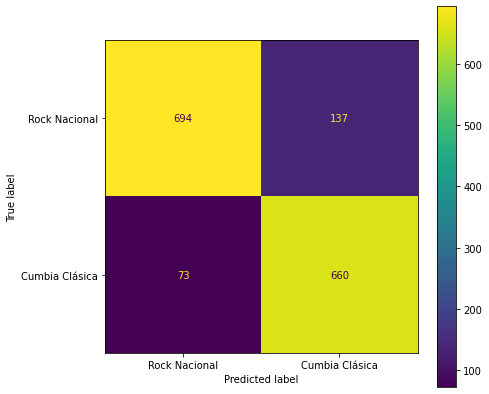

In [29]:
#Ploteamos la Matriz
plt.rcParams['figure.figsize'] = (7, 7)
plot_confusion_matrix(tree_fit, df_modelo.drop(['target'], axis=1).values, df_modelo["target"], display_labels=[str(genero_0), str(genero_1)])
plt.show()

Se observa como de los 210 errores cometidos, 137 fueron canciones de música Rock Nacional que se predijeron como Cumbia Clásica, mientras que solo 73 fueron una canción de Cumbia Clásica predicta como Rock Nacional. Como se dijo anteriormente, este desbalance no es de gran preocupación debido al tema tratado, pero en futuro se podría analizar si no es algo recurrente o simplemente sucede con este split realizado o los parametros elegidos.

## Visualización del árbol de decisión


In [30]:
tree_model = DecisionTreeClassifier(class_weight= {0: 1, 1: 1}, 
                                    criterion= 'gini', 
                                    max_depth= 4, 
                                    min_samples_leaf= 3, 
                                    min_samples_split= 2, 
                                    random_state= 15)

model = tree_model.fit(X_train, y_train)


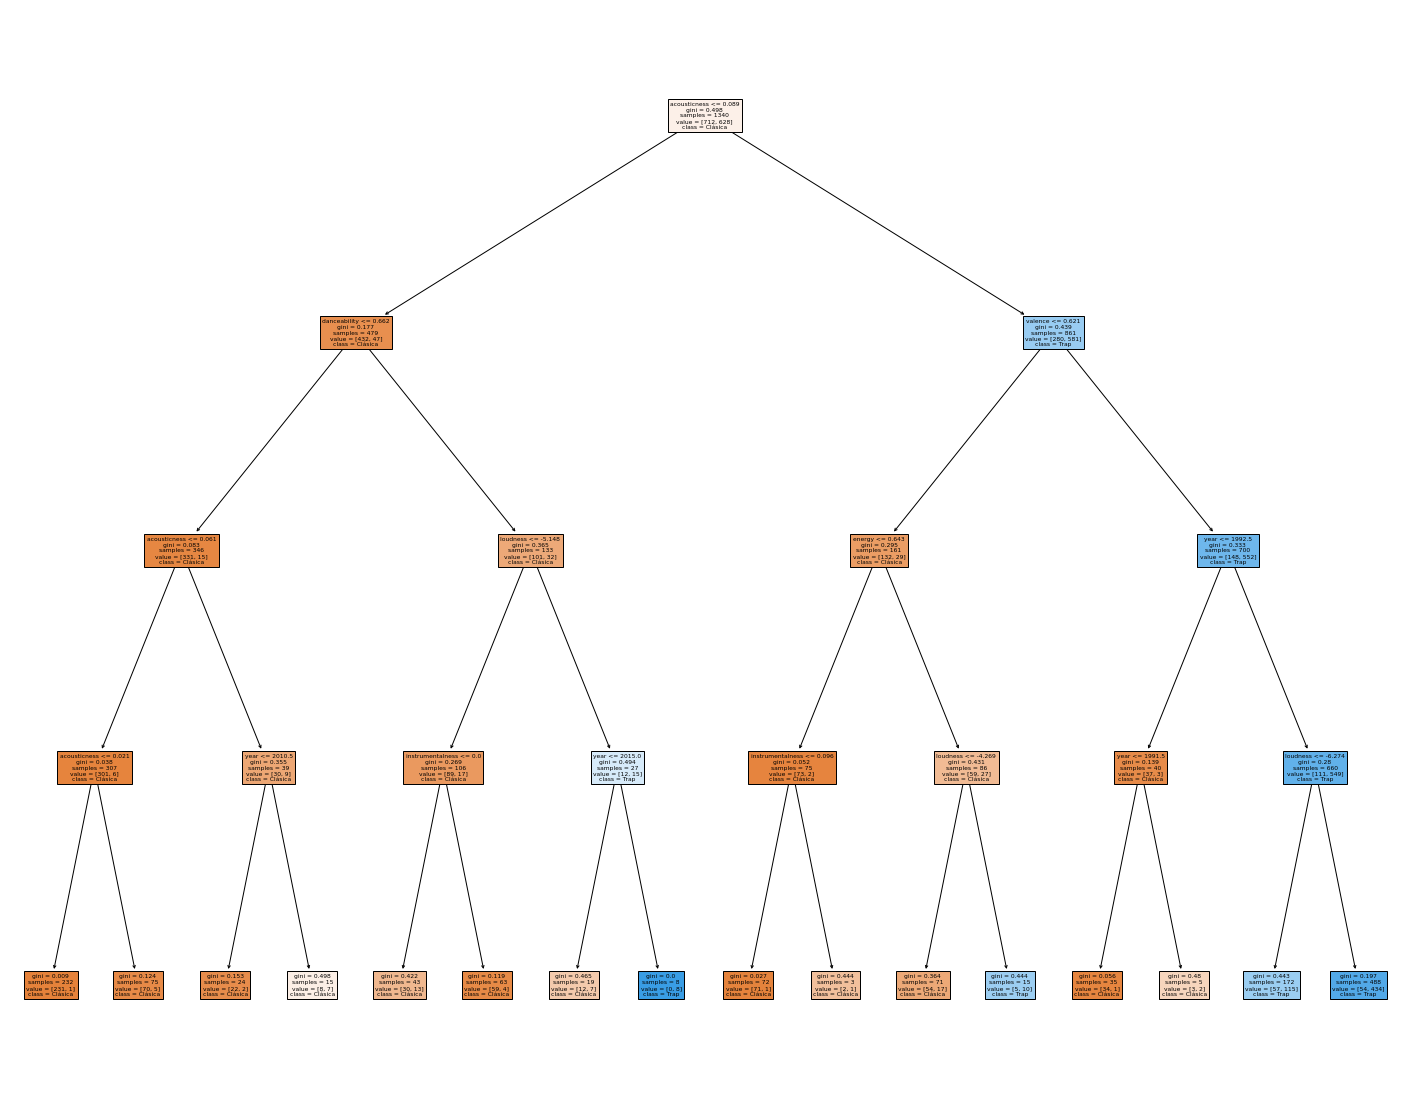

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, feature_names=df_modelo.drop('target', axis=1).columns,class_names=('Clásica','Trap'),filled=True)

Se observa como el árbol para estos géneros es mucho mas extenso que en el caso anterior y aún asi logra valores de accuracy menores.

## Predicción

In [32]:
df_pred = pd.DataFrame(columns=df_final.drop(['time_signature', 'tempo', 'liveness', 'key', 'explicit', 'popularity'], axis=1).columns) #Se crea el dataframe donde estaran los temas a predecir
df_pred.loc[0] = df_final.loc[588] #Agrego "Colocao" de Nicki Nicole al dataframe
print(f"Canción: {df_pred['title'][0]}")
print(f"Artista: {df_pred['all_artists'][0]}")

prediction = tree_model.predict(df_pred.drop(['id', 'title', 'all_artists', 'target'], axis = 1).values)

if prediction == 1:
    prediction_name = str(genero_1)
else:
    prediction_name = str(genero_0)

print(f"Prediccion: {str(prediction_name)}")
probability = tree_model.predict_proba(df_pred.drop(['id', 'title', 'all_artists', 'target'], axis = 1).values)
print("Probabilidad de Acierto: " + str(round(probability[0][prediction][0]* 100, 2))+"%")  

if prediction == df_pred['target'][0]:
    print('La predicción es acertada')
else:
    print('La predicción es erronea')

Canción: Pequeños Sueños - En Vivo
Artista: Árbol
Prediccion: Rock Nacional
Probabilidad de Acierto: 93.33%
La predicción es acertada


Se observa como el modelo predice con un 93.33% de probabilidad que el tema "Pequeños Sueños - En Vivo" pertenece a la playlist de Cumbia Clásica, lo cual es acertado.

## Predicción según ID de Spotify
Ingresando una Id de spotify se puede saber la probabilidad de que pertenezca a cada uno de los grupos. Cabe destacar que si la canción elegida es de algpun género que no pertenezca al analizado en este trabajo el resultado obtenido no será debe ser tomado en cuenta.

In [33]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [34]:
#Importing my own credentials for the Spotify API
cid_txt = open('Client_ID.txt')
client_secret_txt = open('Client_Secret.txt')

cid = cid_txt.read()
secret = client_secret_txt.read()

#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [35]:
track_id = '3spdoTYpuCpmq19tuD0bOe'

df_pred = pd.DataFrame(columns=['id', 'title', 'all_artists', 'popularity', 'year', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'])

features = sp.audio_features(track_id)
track = sp.track(track_id)
df_pred.loc[0] = (track['id'],track['name'],track['artists'][0]['name'],track['popularity'],track['album']['release_date'][0:4],track['explicit'],features[0]['danceability'],features[0]['energy'],features[0]['key'],features[0]['loudness'],features[0]['mode'],features[0]['acousticness'],features[0]['instrumentalness'],features[0]['liveness'],features[0]['valence'],features[0]['tempo'],features[0]['duration_ms'],features[0]['time_signature'])  

print('Canción:', track['name'], 'de', track['artists'][0]['name'])
prediction = tree_model.predict(df_pred.drop(['id', 'title', 'all_artists', 'time_signature', 'tempo', 'liveness', 'key', 'explicit', 'popularity'], axis = 1).values)

if prediction == 1:
    prediction_name = str(genero_0)
else:
    prediction_name = str(genero_1)
        
print(f"Prediccion: {prediction_name}")
probability = tree_model.predict_proba(df_pred.drop(['id', 'title', 'all_artists', 'time_signature', 'tempo', 'liveness', 'key', 'explicit', 'popularity'], axis = 1).values)
print("Probabilidad de Acierto: " + str(round(probability[0][prediction][0]* 100, 2))+"%")  

Canción: My Way de Frank Sinatra
Prediccion: Cumbia Clásica
Probabilidad de Acierto: 98.61%


Nuevamente, al colocar una canción ajena a los géneros estudiados el modelo predice erroneamente con gran probabilidad de acierto.

## Comparación de la importancia de cada feature

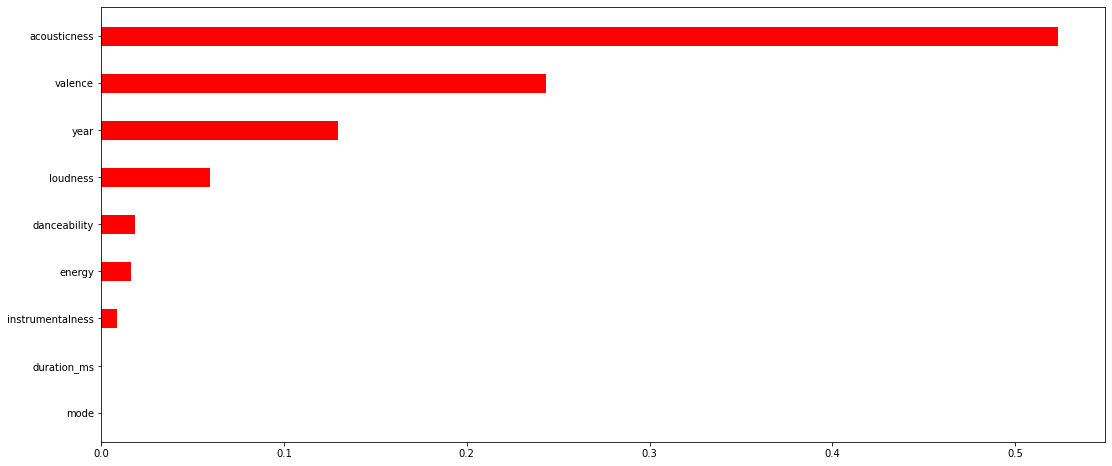

In [36]:
#Ploteo las importancias
feature_importance=pd.DataFrame({
    'dt':tree_model.feature_importances_
},index=df_modelo.drop(['target'], axis=1).columns)
feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='red',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

plt.show()

Se observa como el modelo le da una importancia al feature "acousticness" de mas del 50%, mientras que el resto de la importancia la reparte en otras 6 features y deja sin importancia a las restantes. Comparandolo con el caso anterior, el modelo utiliza muchas mas features, algo esperable al analizar ambos árboles.

## Conclusiones
Se concluye que la creación de ambos algoritmos fue satisfactoria y que la adaptación del modelo al cambiar los géneros analizados es realizable de manera sencilla. 